Czech Bank Data Investigation 💼


Practice Exercise: Cleaning data & Transforming columns/features
Context:
• The data is based on real anonymized Czech bank transactions and account info.
• We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course.
⚫ 
But here is the original task description of the dataset publishers:
The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services) and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.
• We've made minor changes on the data to fit this exercise, such as changing the column names. Check out the original source if you are interested in using this data for other purposes (https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

Dataset Description:
We'll work on three datasets (in three separate csv files):
⚫ account: each record describes static characteristics of an account
⚫ transaction: each record describes one transaction on an account
⚫ district: each record describes demographic characteristics of a district
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

Objective:
• Examine/clean the individual dataset
• Combine them into a single dataset, which is subject to more cleaning
• Create new columns based on existing columns
By the end, the new dataset is ready for more analysis.


1. Import the libraries

In [2]:
import pandas as pd

2. Import the data from three csv files as DataFrames account, district, trans
Hint:
⚫ the read_csv function can automatically infer and load zip file, read its documentation of parameter compression if you are interested in details
⚫ you may ignore the warning when reading the trans.csv.zip file. It is optional to follow the warning instructions to remove it.

In [3]:
account = pd.read_csv('./datasets/account.csv',delimiter=';',encoding='utf-8')
district = pd.read_csv('./datasets/district.csv',delimiter=';',encoding='utf-8')
trans= pd.read_csv('./datasets/trans.csv',delimiter=';',encoding='utf-8')
 

C:\Users\Om\AppData\Local\Temp\ipykernel_2160\1987990376.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans= pd.read_csv('./datasets/trans.csv',delimiter=';',encoding='utf-8')


3. Look at the info summary, head of each DataFrame

In [4]:
print(account.head())
print(account.info())

   account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
None


In [5]:
print(district.head())
print(district.info())

   A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4  

In [6]:
print(trans.head())
print(trans.info())

   trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5 

4. Check for the unique values and their counts in each column for the three DataFrames

In [7]:
account.nunique()

account_id     4500
district_id      77
frequency         3
date           1535
dtype: int64

In [8]:
district.nunique()

A1     77
A2     77
A3      8
A4     77
A5     53
A6     36
A7     17
A8      6
A9     11
A10    70
A11    76
A12    71
A13    73
A14    44
A15    76
A16    76
dtype: int64

In [9]:
trans.nunique()

trans_id      1056320
account_id       4500
date             2191
type                3
operation           5
amount          40400
balance        542739
k_symbol            8
bank               13
account          7665
dtype: int64

5. Check for duplicates in the three DataFrames

In [10]:
account[account.duplicated()]

,account_id,district_id,frequency,date


In [11]:
district[district.duplicated()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16


In [12]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account


In [13]:
disp = pd.read_csv('./datasets/disp.csv',delimiter=';')

6. Convert column account_open_date in account and column date in trans into datetime dtypes

In [14]:


# Assuming df_account is your "account" DataFrame
account['date'] = pd.to_datetime(account['date'], format='%y%m%d')

# Assuming df_trans is your "trans" DataFrame
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')

# account['date'].astype('datetime64[as]')

In [15]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


7. Convert the columns region and district_name in district to all uppercase

In [16]:
new_column_names = {
    "A1": "district_code",
    "A2": "district_name",
    "A3": "region",
    "A4": "no_of_inhabitants",
    "A5": "no_of_municipalities_lt_499",
    "A6": "no_of_municipalities_500_1999",
    "A7": "no_of_municipalities_2000_9999",
    "A8": "no_of_municipalities_gt_10000",
    "A9": "no_of_cities",
    "A10": "ratio_of_urban_inhabitants",
    "A11": "average_salary",
    "A12": "unemployment_rate_95",
    "A13": "unemployment_rate_96",
    "A14": "no_of_entrepreneurs_per_1000",
    "A15": "no_of_committed_crimes_95",
    "A16": "no_of_committed_crimes_96"
}

district.rename(columns=new_column_names, inplace=True)


In [17]:
district.columns

Index(['district_code', 'district_name', 'region', 'no_of_inhabitants',
       'no_of_municipalities_lt_499', 'no_of_municipalities_500_1999',
       'no_of_municipalities_2000_9999', 'no_of_municipalities_gt_10000',
       'no_of_cities', 'ratio_of_urban_inhabitants', 'average_salary',
       'unemployment_rate_95', 'unemployment_rate_96',
       'no_of_entrepreneurs_per_1000', 'no_of_committed_crimes_95',
       'no_of_committed_crimes_96'],
      dtype='object')

In [18]:
district[['district_name', 'region']] = district[['district_name', 'region']].applymap(str.upper)
# district['region'] = district['region'].apply(str.upper)
# district['district_name'] = district['district_name'].apply(str.upper)

In [19]:
district.head()

,district_code,district_name,region,no_of_inhabitants,no_of_municipalities_lt_499,no_of_municipalities_500_1999,no_of_municipalities_2000_9999,no_of_municipalities_gt_10000,no_of_cities,ratio_of_urban_inhabitants,average_salary,unemployment_rate_95,unemployment_rate_96,no_of_entrepreneurs_per_1000,no_of_committed_crimes_95,no_of_committed_crimes_96
0,1,HL.M. PRAHA,PRAGUE,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,BENESOV,CENTRAL BOHEMIA,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,BEROUN,CENTRAL BOHEMIA,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,KLADNO,CENTRAL BOHEMIA,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,KOLIN,CENTRAL BOHEMIA,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


8. Check for missing data by columns in account using the isna method

In [20]:
account.isna().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

9. Check for missing data by columns in district using the isna method


In [21]:
district.isna().sum()

district_code                     0
district_name                     0
region                            0
no_of_inhabitants                 0
no_of_municipalities_lt_499       0
no_of_municipalities_500_1999     0
no_of_municipalities_2000_9999    0
no_of_municipalities_gt_10000     0
no_of_cities                      0
ratio_of_urban_inhabitants        0
average_salary                    0
unemployment_rate_95              0
unemployment_rate_96              0
no_of_entrepreneurs_per_1000      0
no_of_committed_crimes_95         0
no_of_committed_crimes_96         0
dtype: int64

In [22]:
district.rename(columns={'no_of_inhabitants':'population'}, inplace=True)

In [23]:
district[['no_of_committed_crimes_95','no_of_committed_crimes_96']].isna().sum()

no_of_committed_crimes_95    0
no_of_committed_crimes_96    0
dtype: int64

In [24]:
district["no_of_committed_crimes_95"] = pd.to_numeric(district["no_of_committed_crimes_95"],errors="coerce")
district["no_of_committed_crimes_96"] = pd.to_numeric(district["no_of_committed_crimes_96"],errors="coerce")


In [25]:

# Create a new column 'total_committed_crimes' by adding the values of the two columns
district["num_committed_crimes"] = district["no_of_committed_crimes_95"] + district["no_of_committed_crimes_96"]


In [26]:
# Drop the original columns
district.drop(["no_of_committed_crimes_95", "no_of_committed_crimes_96"], axis=1, inplace=True)


In [27]:
# lets to same for unemployementrate
district['unemployment_rate_95'] = pd.to_numeric(district['unemployment_rate_95'],errors='coerce')
district['unemployment_rate_96'] = pd.to_numeric(district['unemployment_rate_96'],errors='coerce')

In [28]:
district["unemployment_rate"] = district['unemployment_rate_95'] + district['unemployment_rate_96']

In [29]:
district.drop(['unemployment_rate_95', 'unemployment_rate_96'], axis=1, inplace=True)

In [30]:
district.head()

,district_code,district_name,region,population,no_of_municipalities_lt_499,no_of_municipalities_500_1999,no_of_municipalities_2000_9999,no_of_municipalities_gt_10000,no_of_cities,ratio_of_urban_inhabitants,average_salary,no_of_entrepreneurs_per_1000,num_committed_crimes,unemployment_rate
0,1,HL.M. PRAHA,PRAGUE,1204953,0,0,0,1,1,100.0,12541,167,184784.0,0.72
1,2,BENESOV,CENTRAL BOHEMIA,88884,80,26,6,2,5,46.7,8507,132,4833.0,3.52
2,3,BEROUN,CENTRAL BOHEMIA,75232,55,26,4,1,5,41.7,8980,111,5637.0,4.16
3,4,KLADNO,CENTRAL BOHEMIA,149893,63,29,6,2,6,67.4,9753,109,11136.0,9.69
4,5,KOLIN,CENTRAL BOHEMIA,95616,65,30,4,1,6,51.4,9307,118,5656.0,8.28



Use IterativeImputer in sklearn to impute based on columns population, average_salary, unemployment_rate, num_committed_crimes
Import libraries
Build a list of columns that will be used for imputation, which are population, average_salary, unemployment_rate, num_committed_crimes These are the columns that might be related to each other
Create Iterative Imputer object and set its min_value and max_value parameters to be the minumum and maximum of corresponding columns
Apply the imputer to fit and transform the columns to an imputed NumPy array
2:36/3:31 Assign the imputed array back to the original DataFrame's columns

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

In [32]:
# Define the columns to be imputed
columns_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

# Create Iterative Imputer object
imputer = IterativeImputer(min_value=np.min(district[columns_to_impute]),
                           max_value=np.max(district[columns_to_impute]))

# Fit and transform the columns to an imputed NumPy array
imputed_values = imputer.fit_transform(district[columns_to_impute])

# Assign the imputed values back to the original DataFrame's columns
district[columns_to_impute] = imputed_values


c:\Users\Om\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Om\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [33]:
district[columns_to_impute]

,population,average_salary,unemployment_rate,num_committed_crimes
0,1204953.0,12541.0,0.72,184784.0
1,88884.0,8507.0,3.52,4833.0
2,75232.0,8980.0,4.16,5637.0
3,149893.0,9753.0,9.69,11136.0
4,95616.0,9307.0,8.28,5656.0
...,...,...,...,...
72,182027.0,8746.0,7.07,8788.0
73,323870.0,10673.0,10.19,37129.0
74,138032.0,8819.0,11.04,8568.0
75,127369.0,8369.0,10.61,6543.0


In [34]:
imputed_values

array([[1.20495300e+06, 1.25410000e+04, 7.20000000e-01, 1.84784000e+05],
       [8.88840000e+04, 8.50700000e+03, 3.52000000e+00, 4.83300000e+03],
       [7.52320000e+04, 8.98000000e+03, 4.16000000e+00, 5.63700000e+03],
       [1.49893000e+05, 9.75300000e+03, 9.69000000e+00, 1.11360000e+04],
       [9.56160000e+04, 9.30700000e+03, 8.28000000e+00, 5.65600000e+03],
       [7.79630000e+04, 8.54600000e+03, 6.97000000e+00, 5.76000000e+03],
       [9.47250000e+04, 9.92000000e+03, 5.13000000e+00, 9.13500000e+03],
       [1.12065000e+05, 1.12770000e+04, 2.69000000e+00, 1.01660000e+04],
       [8.13440000e+04, 8.89900000e+03, 7.36000000e+00, 5.47400000e+03],
       [9.20840000e+04, 1.01240000e+04, 1.10000000e+00, 8.12600000e+03],
       [7.56370000e+04, 9.62200000e+03, 1.04000000e+00, 7.00400000e+03],
       [1.07870000e+05, 8.75400000e+03, 8.14000000e+00, 7.67200000e+03],
       [5.39210000e+04, 8.59800000e+03, 6.03000000e+00, 3.47200000e+03],
       [1.77686000e+05, 1.00450000e+04, 3.13000000e

10. Check for missing data by columns in trans using the isna method

In [35]:
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

Divide the columns into numeric columns and categorical columns, then use the fillna method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [36]:
# Define categorical and numeric columns
cat_cols = trans.select_dtypes(exclude='number').columns
num_cols = trans.select_dtypes(include='number').columns

# Fill missing values for categorical columns with 'UNKNOWN'
trans[cat_cols] = trans[cat_cols].fillna('UNKNOWN')

# Fill missing values for numeric columns with -999
trans[num_cols] = trans[num_cols].fillna(-999)


11. Check for outliers in district using the describe method, then look at the histograms of the suspicious columns

In [37]:
district.describe().T

,count,mean,std,min,25%,50%,75%,max
district_code,77.0,39.000000,22.371857,1.00,20.00,39.00,58.00,77.00
population,77.0,133884.896104,136913.464909,42821.00,85852.00,108871.00,139012.00,1204953.00
no_of_municipalities_lt_499,77.0,48.623377,32.741829,0.00,22.00,49.00,71.00,151.00
no_of_municipalities_500_1999,77.0,24.324675,12.780991,0.00,16.00,25.00,32.00,70.00
no_of_municipalities_2000_9999,77.0,6.272727,4.015222,0.00,4.00,6.00,8.00,20.00
no_of_municipalities_gt_10000,77.0,1.727273,1.008338,0.00,1.00,2.00,2.00,5.00
no_of_cities,77.0,6.259740,2.435497,1.00,5.00,6.00,8.00,11.00
ratio_of_urban_inhabitants,77.0,63.035065,16.221727,33.90,51.90,59.80,73.50,100.00
average_salary,77.0,9031.675325,790.202347,8110.00,8512.00,8814.00,9317.00,12541.00
no_of_entrepreneurs_per_1000,77.0,116.129870,16.608773,81.00,105.00,113.00,126.00,167.00


In [56]:
num_cols_dis = district.select_dtypes(include='number').columns
num_cols_dis

Index(['district_code', 'population', 'no_of_municipalities_lt_499',
       'no_of_municipalities_500_1999', 'no_of_municipalities_2000_9999',
       'no_of_municipalities_gt_10000', 'no_of_cities',
       'ratio_of_urban_inhabitants', 'average_salary',
       'no_of_entrepreneurs_per_1000', 'num_committed_crimes',
       'unemployment_rate'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021743213FA0>,
      dtype=object)

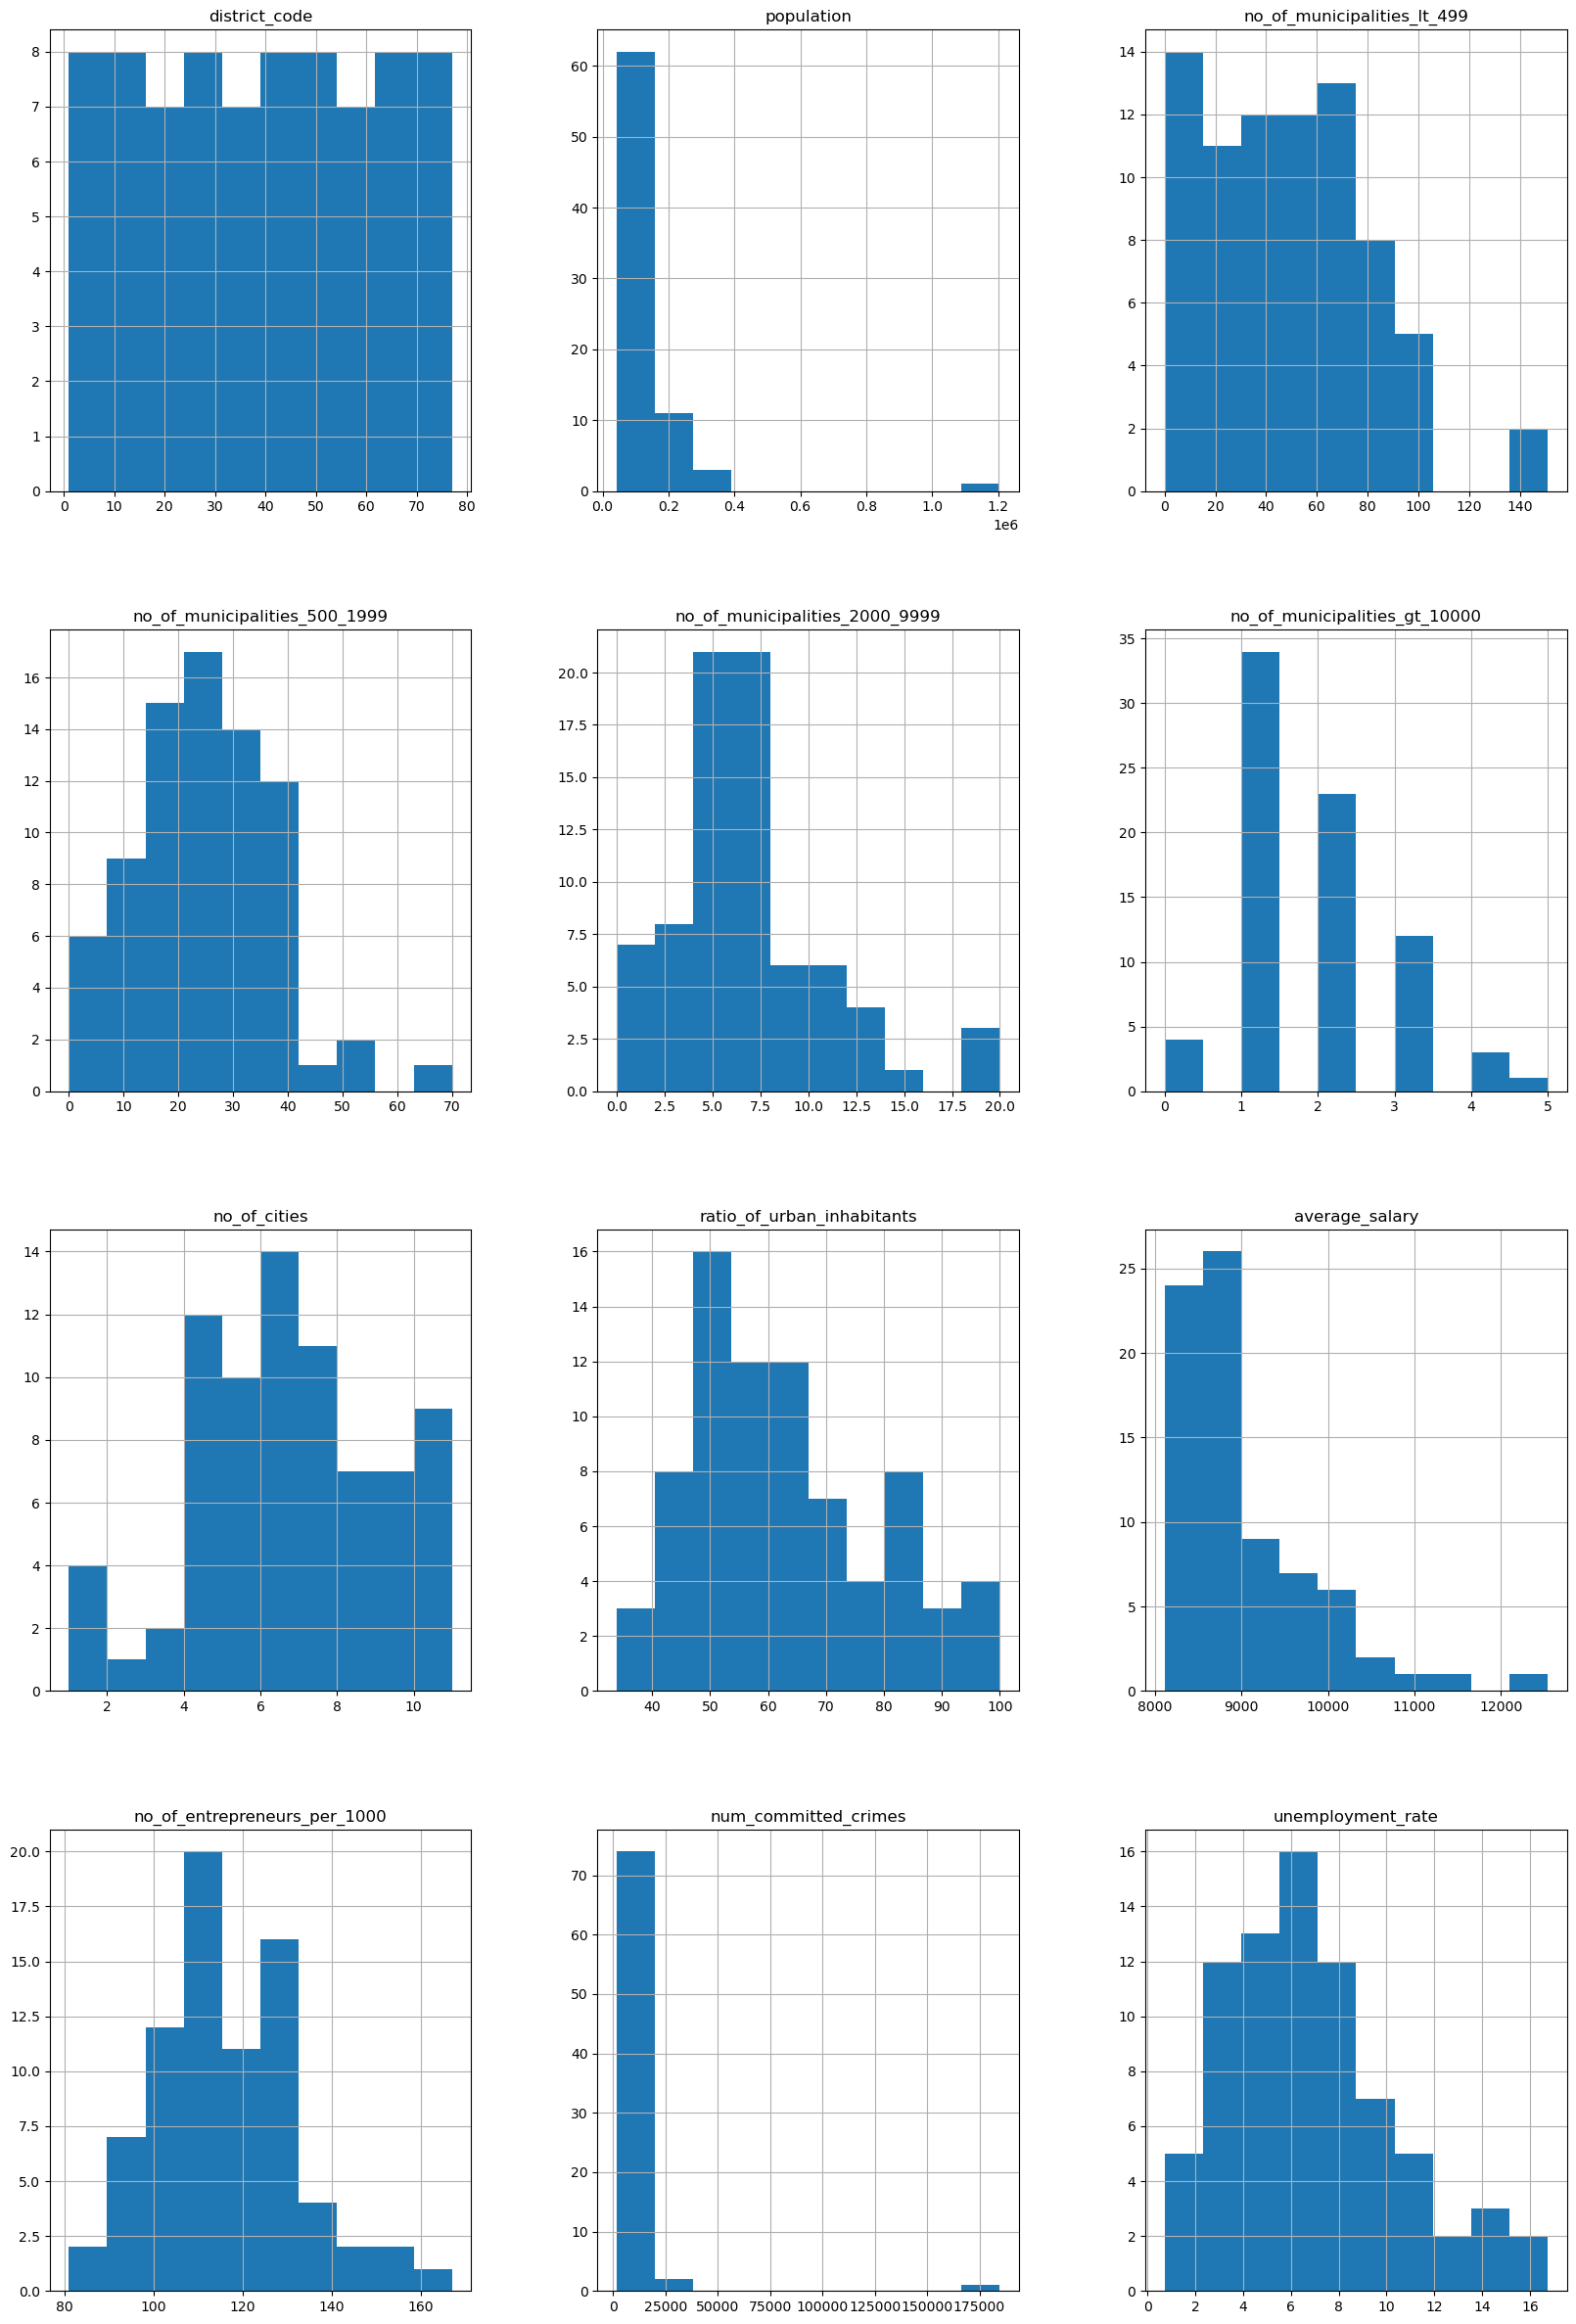

In [82]:
num_cols_dis
district[num_cols_dis].hist(figsize=(20,30))




in the above image , the outlier containing column are 
population
average_salary
num_commited_crimes

you can see in the below boxplots

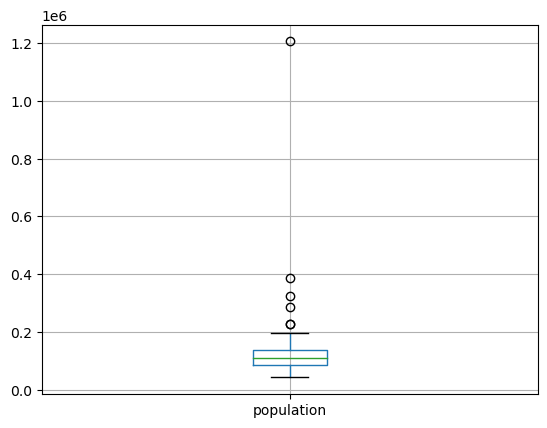

In [84]:
district.boxplot('population')

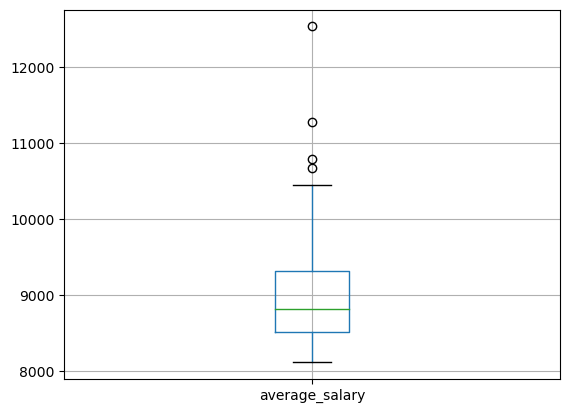

In [85]:
district.boxplot('average_salary')

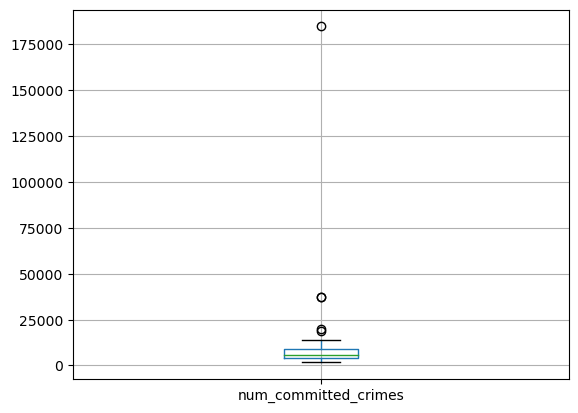

In [87]:
district.boxplot('num_committed_crimes')

removing ouliers

In [122]:
q1 = district['average_salary'].quantile(0.25)
q3 = district['average_salary'].quantile(0.75)

iqr = q3-q1
print(q1,q3,iqr)

8475.5 9151.0 675.5


In [123]:
# outliers are the values below q1-1.5*iqr / q3+1.5*iqr

outlier_low = q1-1.5*iqr

In [124]:
outlier_high = (q3+1.5*iqr)

In [125]:
district['average_salary'].value_counts()

8369.0    2
8507.0    1
8363.0    1
8541.0    1
8187.0    1
         ..
8930.0    1
9272.0    1
8705.0    1
9675.0    1
8909.0    1
Name: average_salary, Length: 70, dtype: int64

In [126]:
msk = (district['average_salary']<outlier_low) | (district['average_salary']>outlier_high)

In [127]:
district = district[~msk]

In [128]:
district['average_salary'].value_counts()
# note 3 entries got dropped now

8369.0    2
8507.0    1
8772.0    1
9832.0    1
8388.0    1
         ..
9272.0    1
8705.0    1
9675.0    1
8867.0    1
8909.0    1
Name: average_salary, Length: 67, dtype: int64

11. Check for outliers in trans using the describe method, then look at the histograms of the suspicious columns

In [129]:
trans.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_id,1056320.0,1.335311e+06,1.227487e+06,1.0,430262.75,858506.5,2060979.250,3682987.0
account_id,1056320.0,2.936867e+03,2.477345e+03,1.0,1204.00,2434.0,3660.000,11382.0
amount,1056320.0,5.924146e+03,9.522735e+03,0.0,135.90,2100.0,6800.000,87400.0
balance,1056320.0,3.851833e+04,2.211787e+04,-41125.7,22402.50,33143.4,49603.625,209637.0
account,1056320.0,1.277068e+07,2.613658e+07,-999.0,-999.00,-999.0,3410566.000,99994199.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217503939A0>,
      dtype=object)

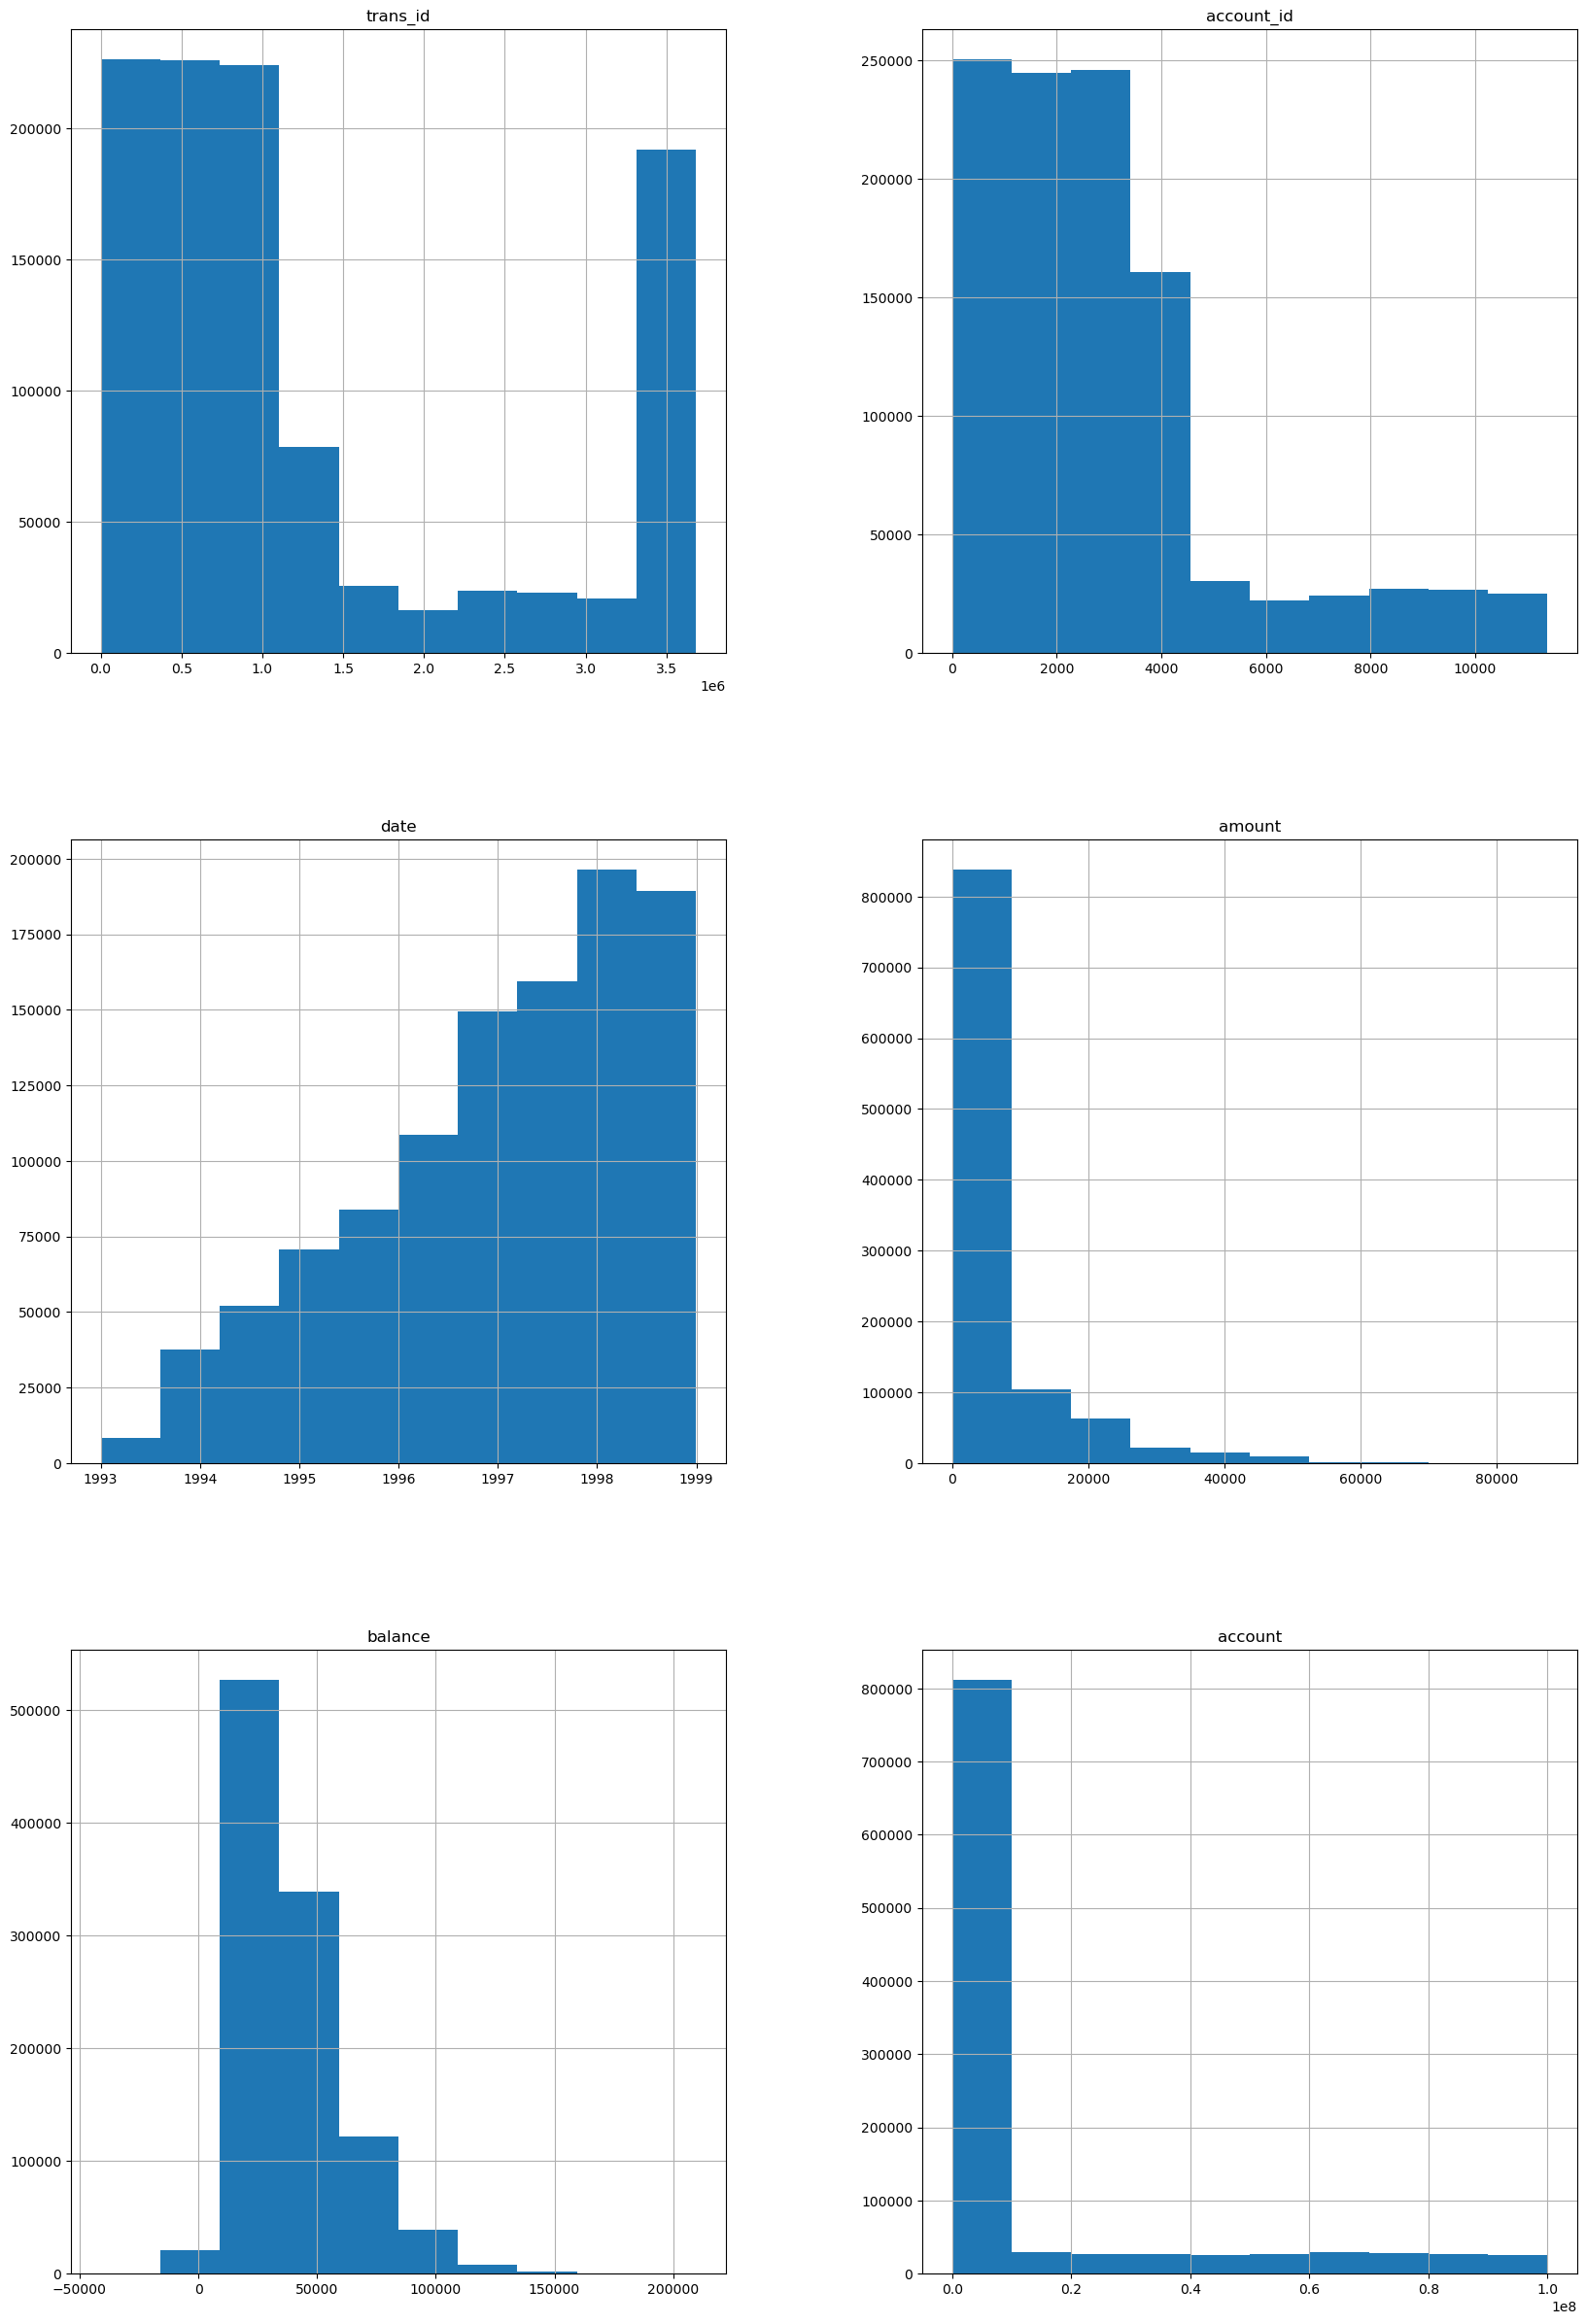

In [131]:
trans.hist(figsize=(20,30))

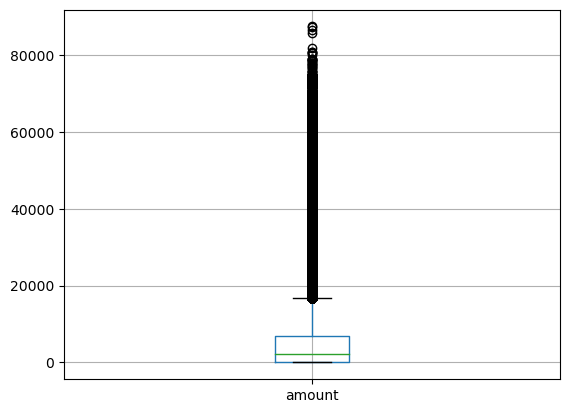

In [132]:
trans.boxplot('amount')

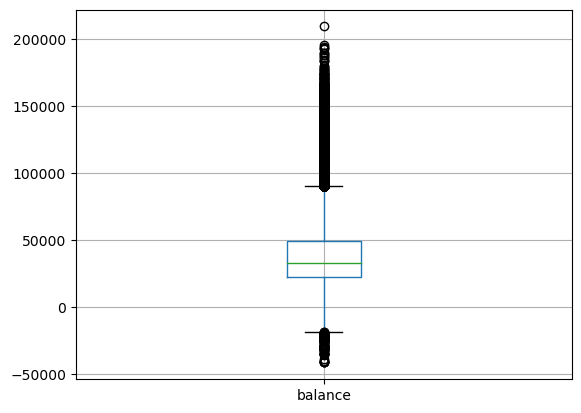

In [133]:
trans.boxplot('balance')

In [136]:
p99 = trans['balance'].quantile(0.99)

trans.loc[trans['balance']>p99,'balance']

300        111071.7
873        125825.7
1286       134571.2
1301       127661.8
1606       120512.8
             ...   
1056122    121828.0
1056146    109173.0
1056149    117210.5
1056181    109574.6
1056215    108432.0
Name: balance, Length: 10564, dtype: float64

In [149]:
q1 = trans['balance'].quantile(0.25)
q3 = trans['balance'].quantile(0.75)
iqr = q3 - q1 #Interquartile range
LOWER_BOND = q1 -(1.5* iqr)
UPPER_BOND= q3 + (1.5 * iqr)


imputing with statistics 

In [150]:
# for numeric ---> mean,median
# fir catogorical --> mode 

tran_num_cols = trans.select_dtypes(include='number').columns
tran_cat_cols = trans.select_dtypes(exclude='number').columns


In [148]:
trans[tran_num_cols] = trans[tran_num_cols].fillna(trans[tran_num_cols].median())

trans[tran_num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
trans_id,1056320.0,1.335311e+06,1.227487e+06,1.0,430262.75,858506.5,2060979.250,3682987.0
account_id,1056320.0,2.936867e+03,2.477345e+03,1.0,1204.00,2434.0,3660.000,11382.0
amount,1056320.0,5.924146e+03,9.522735e+03,0.0,135.90,2100.0,6800.000,87400.0
balance,1056320.0,3.851833e+04,2.211787e+04,-41125.7,22402.50,33143.4,49603.625,209637.0
account,1056320.0,1.277068e+07,2.613658e+07,-999.0,-999.00,-999.0,3410566.000,99994199.0


13. Merge (left join) account and district into a new DataFrame called account_district using their common columns

In [156]:
account['district_id']

0       55
1       74
2       55
3       16
4       24
        ..
4495    55
4496    59
4497    30
4498    63
4499     1
Name: district_id, Length: 4500, dtype: int64

In [158]:
district['district_code']

1      2
2      3
3      4
4      5
5      6
      ..
70    71
72    73
74    75
75    76
76    77
Name: district_code, Length: 68, dtype: int64

In [159]:
account_district = pd.merge(left=account,right=district,left_on='district_id',right_on='district_code',how='left')

14. Check the information summary of account_district, any missing data?


In [169]:
account_district.isna().sum()

account_id                           0
district_id                          0
frequency                            0
date                                 0
district_code                     1282
district_name                     1282
region                            1282
population                        1282
no_of_municipalities_lt_499       1282
no_of_municipalities_500_1999     1282
no_of_municipalities_2000_9999    1282
no_of_municipalities_gt_10000     1282
no_of_cities                      1282
ratio_of_urban_inhabitants        1282
average_salary                    1282
no_of_entrepreneurs_per_1000      1282
num_committed_crimes              1282
unemployment_rate                 1282
dtype: int64

Look at the rows with missing data in account_district


In [178]:
row_missing_data = account_district.isna().any(axis=1
                                         )

In [179]:
row_missing_data

0       False
1        True
2       False
3       False
4       False
        ...  
4495    False
4496    False
4497    False
4498    False
4499     True
Length: 4500, dtype: bool

Use SimpleImputer from sklearn to impute the missing data in columns population, average_salary, unemployment_rate, num_committed_crimes with their
means


In [185]:
from sklearn.impute import SimpleImputer 

columns_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

simple_imp_num = SimpleImputer(strategy='mean')


# Fit and transform the columns to an imputed NumPy array
imputed_values = simple_imp_num.fit_transform(account_district[columns_to_impute])

# Assign the imputed values back to the original DataFrame's columns
account_district[columns_to_impute] = imputed_values

In [186]:
account_district[columns_to_impute] 

,population,average_salary,unemployment_rate,num_committed_crimes
0,157042.000000,8743.000000,4.31000,7553.000000
1,108634.410193,8843.481976,6.67899,6150.452144
2,157042.000000,8743.000000,4.31000,7553.000000
3,93931.000000,8427.000000,2.66000,3787.000000
4,122603.000000,8991.000000,3.40000,10471.000000
...,...,...,...,...
4495,157042.000000,8743.000000,4.31000,7553.000000
4496,108871.000000,8444.000000,6.71000,4900.000000
4497,94812.000000,9650.000000,7.05000,5789.000000
4498,86513.000000,8288.000000,8.31000,3022.000000


In [189]:
account_district.isna().sum()

account_id                           0
district_id                          0
frequency                            0
date                                 0
district_code                     1282
district_name                     1282
region                            1282
population                           0
no_of_municipalities_lt_499       1282
no_of_municipalities_500_1999     1282
no_of_municipalities_2000_9999    1282
no_of_municipalities_gt_10000     1282
no_of_cities                      1282
ratio_of_urban_inhabitants        1282
average_salary                       0
no_of_entrepreneurs_per_1000      1282
num_committed_crimes                 0
unemployment_rate                    0
dtype: int64

Use fillna method to impute the missing data in columns district_name and region with 'UNKNOWN'

In [192]:
account_district[['district_name', 'region']] = account_district[['district_name', 'region']].fillna('UNKNOWN')


In [193]:
account_district.isna().sum()

account_id                           0
district_id                          0
frequency                            0
date                                 0
district_code                     1282
district_name                        0
region                               0
population                           0
no_of_municipalities_lt_499       1282
no_of_municipalities_500_1999     1282
no_of_municipalities_2000_9999    1282
no_of_municipalities_gt_10000     1282
no_of_cities                      1282
ratio_of_urban_inhabitants        1282
average_salary                       0
no_of_entrepreneurs_per_1000      1282
num_committed_crimes                 0
unemployment_rate                    0
dtype: int64

15. Merge (left join) trans and account_district into a new DataFrame called a11_data using their common columns

In [195]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   1056320 non-null  object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    1056320 non-null  object        
 8   bank        1056320 non-null  object        
 9   account     1056320 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [207]:
all_data_new = pd.merge(left=trans,right=account_district,left_on='account_id',right_on='account_id',how='left')

Check the information summary of all_data

In [208]:
all_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 27 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   trans_id                        1056320 non-null  int64         
 1   account_id                      1056320 non-null  int64         
 2   date_x                          1056320 non-null  datetime64[ns]
 3   type                            1056320 non-null  object        
 4   operation                       1056320 non-null  object        
 5   amount                          1056320 non-null  float64       
 6   balance                         1056320 non-null  float64       
 7   k_symbol                        1056320 non-null  object        
 8   bank                            1056320 non-null  object        
 9   account                         1056320 non-null  float64       
 10  district_id                     1056320 no

16. Create a new column account_open_year and assign it as the year from column account_open_date

In [209]:
all_data_new.rename(columns={'date_x':'transaction_date','date_y':'account_open_date'},inplace=True)

In [210]:
all_data_new['account_open_year'] = all_data_new['account_open_date'].dt.year

In [211]:
all_data_new.columns

Index(['trans_id', 'account_id', 'transaction_date', 'type', 'operation',
       'amount', 'balance', 'k_symbol', 'bank', 'account', 'district_id',
       'frequency', 'account_open_date', 'district_code', 'district_name',
       'region', 'population', 'no_of_municipalities_lt_499',
       'no_of_municipalities_500_1999', 'no_of_municipalities_2000_9999',
       'no_of_municipalities_gt_10000', 'no_of_cities',
       'ratio_of_urban_inhabitants', 'average_salary',
       'no_of_entrepreneurs_per_1000', 'num_committed_crimes',
       'unemployment_rate', 'account_open_year'],
      dtype='object')

17. Calculate the difference between columns date (transaction date) and account_open_date

In [212]:
all_data_new['transaction_date'] = pd.to_datetime(all_data_new['transaction_date'])
all_data_new['account_open_date'] = pd.to_datetime(all_data_new['account_open_date'])

In [220]:
all_data_new['date_account_open_diff'] = (all_data_new['transaction_date'] - all_data_new['account_open_date'] ).dt.days

# to get week difference divide by 7 (floor division // )
# to get year difference divide by 365 (floor division // )

In [221]:
all_data_new[['transaction_date','account_open_date','date_account_open_diff']]

,transaction_date,account_open_date,date_account_open_diff
0,1993-01-01,1993-01-01,0
1,1993-01-01,1993-01-01,0
2,1993-01-01,1993-01-01,0
3,1993-01-01,1993-01-01,0
4,1993-01-02,1993-01-02,0
...,...,...,...
1056315,1998-12-31,1996-09-20,832
1056316,1998-12-31,1995-05-15,1326
1056317,1998-12-31,1996-09-27,825
1056318,1998-12-31,1993-09-09,1939


18. Create a new column account_age_days and assign it as the difference in days between columns date (transaction date) and account_open_date

In [223]:
all_data_new['account_age_days'] = ((all_data_new['transaction_date'] - all_data_new['account_open_date'] ).dt.days)

19. Create a new column amount_category by cutting the column amount into 3 equal-sized bins, and label the bins as "low_amount', 'medium_amount', 'high_amount'

In [225]:
all_data_new['amount_category'] = pd.cut(all_data_new['amount'],bins=3,labels=['low_amount', 'medium_amount', 'high_amount'])

Verify the categories and their counts in amount_category

In [226]:
all_data_new['amount_category'].value_counts()

low_amount       1013033
medium_amount      41336
high_amount         1951
Name: amount_category, dtype: int64

20. Create a new column account_age_days_category by cutting the column account_age_days into 5 equal-width bins

In [232]:

# Assuming you have a DataFrame named 'df' with 'account_age_days' column
# Define the bin edges and labels
bin_edges = [0, 365, 730, 1095, 1460, float('inf')]  # Define the bin edges in days
bin_labels = ['< 1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4+ Years']  # Labels for the bins

# Use pd.cut() to create the new column
all_data_new['account_age_days_category'] = pd.cut(all_data_new['account_age_days'], bins=bin_edges, labels=bin_labels)

# Print the first few rows to verify
print(all_data_new[['account_age_days', 'account_age_days_category']].tail())


         account_age_days account_age_days_category
1056315               832                 2-3 Years
1056316              1326                 3-4 Years
1056317               825                 2-3 Years
1056318              1939                  4+ Years
1056319              2163                  4+ Years


In [233]:
all_data_new.head()

,trans_id,account_id,transaction_date,type,operation,amount,balance,k_symbol,bank,account,...,ratio_of_urban_inhabitants,average_salary,no_of_entrepreneurs_per_1000,num_committed_crimes,unemployment_rate,account_open_year,date_account_open_diff,account_age_days,amount_category,account_age_days_category
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,56.9,8427.000000,107.0,3787.000000,2.66000,1993,0,0,low_amount,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,33.9,8743.000000,111.0,7553.000000,4.31000,1993,0,0,low_amount,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,33.9,8743.000000,111.0,7553.000000,4.31000,1993,0,0,low_amount,NaN
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,NaN,8843.481976,NaN,6150.452144,6.67899,1993,0,0,low_amount,NaN
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,53.5,8909.000000,113.0,7050.000000,9.57000,1993,0,0,low_amount,NaN


In [229]:
all_data_new['account_age_days_category'].value_counts()

(438.0, 876.0]      333012
(-2.19, 438.0]      330815
(876.0, 1314.0]     204014
(1314.0, 1752.0]    131926
(1752.0, 2190.0]     56553
Name: account_age_days_category, dtype: int64